In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [179]:
pd.set_option('display.max_columns', None)

In [181]:
parta_claims_header_raw_df = pd.read_csv("parta_claims_header.csv")
parta_claims_header_raw_df.sort_values(by=['cur_clm_uniq_id'])

,cur_clm_uniq_id,prvdr_oscar_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_bill_fac_type_cd,clm_bill_clsfctn_cd,prncpl_dgns_cd,admtg_dgns_cd,clm_mdcr_npmt_rsn_cd,clm_pmt_amt,clm_nch_prmry_pyr_cd,prvdr_fac_fips_st_cd,bene_ptnt_stus_cd,dgns_drg_cd,clm_op_srvc_type_cd,fac_prvdr_npi_num,oprtg_prvdr_npi_num,atndg_prvdr_npi_num,othr_prvdr_npi_num,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,bene_eqtbl_bic_hicn_num,clm_admsn_type_cd,clm_admsn_src_cd,clm_bill_freq_cd,clm_query_cd,dgns_prcdr_icd_ind,clm_mdcr_instnl_tot_chrg_amt,clm_mdcr_ip_pps_cptl_ime_amt,clm_oprtnl_ime_amt,clm_mdcr_ip_pps_dsprprtnt_amt,clm_hipps_uncompd_care_amt,clm_oprtnl_dsprtnt_amt
510,100190,111821,1228,NaN,40,2018-06-10,2018-06-10,7,7,M1611,NaN,NaN,127.79,NaN,11,1,NaN,F,1780608992,NaN,1.972732e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,415.80,NaN,NaN,NaN,NaN,NaN
521,100402,100226,1261,NaN,60,2017-05-27,2017-06-02,1,1,K5733,K5733,NaN,10602.46,NaN,10,6,330.0,NaN,1689611501,NaN,1.285688e+09,NaN,NaN,NaN,NaN,NaN,1.0,1,1,3,0,70795.63,609.13,0.00,13.92,231.15,NaN
525,100464,360051,12978,NaN,40,2017-06-26,2017-06-26,1,3,R079,NaN,NaN,199.45,NaN,36,1,NaN,C,1073688354,NaN,1.982693e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,2709.80,NaN,NaN,NaN,NaN,NaN
536,100698,140276,11789,NaN,40,2017-07-28,2017-07-28,1,3,M545,NaN,NaN,85.25,NaN,14,1,NaN,C,1376521575,NaN,1.912991e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,115.00,NaN,NaN,NaN,NaN,NaN
540,100750,230216,12138,NaN,40,2018-01-13,2018-01-13,1,3,Z0289,NaN,N,0.00,NaN,23,9,NaN,C,1982685384,NaN,1.063442e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0,226.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1698691,390145,10007,NaN,40,2016-12-11,2016-12-11,1,3,Z01818,NaN,NaN,43.01,NaN,39,1,NaN,C,1689691214,NaN,1.679505e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,235.00,NaN,NaN,NaN,NaN,NaN
4365,1698722,200021,10985,NaN,40,2018-06-16,2018-06-16,1,3,E782,NaN,NaN,179.09,NaN,20,1,NaN,C,1932164795,NaN,1.548289e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,1939.35,NaN,NaN,NaN,NaN,NaN
4366,1698935,210022,1297,NaN,40,2018-04-06,2018-04-06,1,3,I110,NaN,NaN,400.81,NaN,21,9,NaN,C,1205896446,NaN,1.922016e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,554.00,NaN,NaN,NaN,NaN,NaN
4367,1699005,100057,12194,NaN,40,2016-04-27,2016-04-27,1,3,I348,NaN,NaN,265.19,NaN,10,1,NaN,C,1821019571,NaN,1.437130e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,8423.00,NaN,NaN,NaN,NaN,NaN


In [183]:
parta_claims_header_raw_df_count = parta_claims_header_raw_df.shape[0]
parta_claims_header_raw_uniq_clm_id_df = parta_claims_header_raw_df['cur_clm_uniq_id'].drop_duplicates()

parta_claims_header_raw_df_count == parta_claims_header_raw_uniq_clm_id_df.shape[0]

True

In [185]:
parta_claims_header_df = parta_claims_header_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'atndg_prvdr_npi_num',
    'clm_from_dt', 'prncpl_dgns_cd', 'clm_pmt_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'atndg_prvdr_npi_num': 'npi_id'
    }
)
parta_claims_header_df

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt
0,1001595,10226,1.366492e+09,2018-02-28,M25551,259.01
1,1004555,10133,1.942275e+09,2018-11-02,Z9861,29.56
2,1011605,10163,1.578546e+09,2018-01-02,C439,45.88
3,1011758,1003,1.952368e+09,2018-06-12,R310,9.40
4,101424,10052,1.336125e+09,2016-04-13,L821,34.18
...,...,...,...,...,...,...
8621,999774,10367,NaN,2017-11-06,R072,374.08
8622,999808,10496,1.740225e+09,2017-07-19,R079,360.89
8623,999878,12160,1.497784e+09,2018-01-18,R5383,90.73
8624,999961,12090,1.083691e+09,2018-03-10,C73,329.44


In [193]:
parta_claims_header_df_count = parta_claims_header_df.shape[0]

parta_claims_header_raw_df_count == parta_claims_header_df_count

True

In [195]:
parta_claims_header_df.loc[~parta_claims_header_df.prncpl_dgns_cd.notnull()]

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt


In [221]:
parta_claims_revenue_center_detail_raw_df = pd.read_csv("parta_claims_revenue_center_detail.csv",low_memory=False)
parta_claims_revenue_center_detail_raw_df.sort_values(by=['cur_clm_uniq_id'])

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd
318,100073,1,12620,NaN,40,2018-12-02 00:00:00,2018-12-02 00:00:00,403,2018-12-02 00:00:00,77063,NaN,NaN,2018-12-02 00:00:00,2018-12-02 00:00:00,1,24.11,NaN,NaN,NaN,NaN,NaN,00000
383,100184,1,10080,NaN,40,2018-09-06 00:00:00,2018-09-06 00:00:00,1,NaN,NaN,NaN,NaN,2018-09-06 00:00:00,2018-09-06 00:00:00,0,0.00,NaN,NaN,NaN,NaN,NaN,00000
384,100190,1,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,G0467,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,133.74,NaN,NaN,NaN,NaN,NaN,00000
385,100190,2,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,98960,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000
386,100190,3,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,J1100,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,4,0.00,NaN,NaN,NaN,NaN,NaN,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29896,1699197,2,1177,NaN,40,2016-05-22 00:00:00,2016-05-22 00:00:00,302,2016-05-22 00:00:00,86592,NaN,NaN,2016-05-22 00:00:00,2016-05-22 00:00:00,1,5.43,NaN,NaN,NaN,NaN,NaN,00000
29898,1699212,1,1262,NaN,60,2018-12-24 00:00:00,2018-12-25 00:00:00,730,NaN,NaN,NaN,NaN,2018-12-24 00:00:00,2018-12-25 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,00000
29901,1699236,3,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,370,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,2,0.00,NaN,NaN,NaN,NaN,NaN,00000
29899,1699236,1,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,258,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000


In [223]:
parta_claims_revenue_center_detail_raw_df.loc[~(parta_claims_revenue_center_detail_raw_df['clm_line_from_dt']
      == parta_claims_revenue_center_detail_raw_df['clm_from_dt'])]

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd


In [225]:
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_from_dt',
    'clm_line_hcpcs_cd', 'clm_line_cvrd_pd_amt']].drop_duplicates().rename(columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code'
    }
)
parta_claims_revenue_center_detail_df

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.00
1,1001595,10226,2018-02-28 00:00:00,G0283,9.67
7,1001595,10226,2018-02-28 00:00:00,G8978,0.00
8,1001595,10226,2018-02-28 00:00:00,G8979,0.00
10,1001595,10226,2018-02-28 00:00:00,97110,24.97
...,...,...,...,...,...
59414,999961,12090,2018-03-10 00:00:00,A9516,0.00
59415,999961,12090,2018-03-10 00:00:00,G8996,0.00
59416,999976,10768,2016-01-18 00:00:00,80053,11.37
59417,999976,10768,2016-01-18 00:00:00,80061,12.83


In [227]:
parta_claims_revenue_center_detail_df.loc[~parta_claims_revenue_center_detail_df.hcpcs_code.notnull()]

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.0
25,1001595,10226,2018-02-28 00:00:00,NaN,0.0
29,1004555,10133,2018-11-02 00:00:00,NaN,0.0
30,1004904,10106,2018-02-26 00:00:00,NaN,0.0
32,100974,10042,2017-02-20 00:00:00,NaN,0.0
...,...,...,...,...,...
59369,999008,12473,2018-08-04 00:00:00,NaN,0.0
59402,999774,10367,2017-11-06 00:00:00,NaN,0.0
59407,999808,10496,2017-07-19 00:00:00,NaN,0.0
59410,999943,11021,2016-11-20 00:00:00,NaN,0.0


In [229]:
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_df.loc[parta_claims_revenue_center_detail_df.hcpcs_code.notnull()]

In [235]:
parta_claims_revenue_center_detail_df.loc[:, 'claim_date'] = pd.to_datetime(
    parta_claims_revenue_center_detail_df['claim_date']
).dt.strftime('%Y-%m-%d')

In [237]:
claims_header_unique_claims_df = parta_claims_header_df[[
    'claim_id'
]].drop_duplicates()

claims_header_unique_claims_df['header'] = 1

revenue_center_unique_claims_df = parta_claims_revenue_center_detail_df[[
    'claim_id'
]].drop_duplicates()

revenue_center_unique_claims_df['revenue'] = 1

joined_df1 = pd.merge(
    claims_header_unique_claims_df,
    revenue_center_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df1

,claim_id,header,revenue
0,100073,NaN,1.0
1,100190,1.0,1.0
2,100227,NaN,1.0
3,100402,1.0,NaN
4,100464,1.0,1.0
...,...,...,...
15721,1699137,NaN,1.0
15722,1699155,NaN,1.0
15723,1699195,NaN,1.0
15724,1699197,NaN,1.0


In [239]:
print('# of unique claims in Claims Header dataset: ' + str(claims_header_unique_claims_df.shape[0]))
print('# of unique claims in Claims Revenue Center dataset: ' + str(revenue_center_unique_claims_df.shape[0]))

# of unique claims in Claims Header dataset: 8626
# of unique claims in Claims Revenue Center dataset: 13406


In [241]:
# of unique claims in Claims Header dataset: 8626
# of unique claims in Claims Revenue Center dataset: 13406
print('# of unique claims in Claims Header and Claims Revenue Center datasets combined: '
      + str(joined_df1.shape[0]))
print('From combined list of unique claims - ')
print('# of unique claims in only Claims Header dataset: '
      + str(joined_df1.loc[(joined_df1.header == 1) & ~(joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in only Claims Revenue Center dataset: '
      + str(joined_df1.loc[~(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in both Claims Header AND Claims Revenue Center datasets: '
      + str(joined_df1.loc[(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )

# of unique claims in Claims Header and Claims Revenue Center datasets combined: 15726
From combined list of unique claims - 
# of unique claims in only Claims Header dataset: 2320
# of unique claims in only Claims Revenue Center dataset: 7100
# of unique claims in both Claims Header AND Claims Revenue Center datasets: 6306


In [243]:
parta_diagnosis_code_raw_df = pd.read_csv("parta_diagnosis_code.csv")
parta_diagnosis_code_raw_df.sort_values(by=['cur_clm_uniq_id', 'clm_val_sqnc_num'])

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_prod_type_cd,clm_val_sqnc_num,clm_dgns_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_poa_ind,dgns_prcdr_icd_ind
244,100190,1228,NaN,40,NaN,1,M1611,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
243,100190,1228,NaN,40,NaN,2,M25572,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
246,100190,1228,NaN,40,NaN,3,M25551,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
245,100190,1228,NaN,40,NaN,4,M5136,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
366,100402,1261,NaN,60,NaN,11,E119,NaN,100256.0,2017-05-28 00:00:00,2017-06-02 00:00:00,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16232,1699102,11842,NaN,60,NaN,13,Z8673,NaN,330191.0,2017-01-31 00:00:00,2017-02-03 00:00:00,0,0
16236,1699137,10873,NaN,40,NaN,1,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16235,1699137,10873,NaN,40,NaN,2,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16237,1699155,11689,NaN,40,NaN,3,K219,NaN,NaN,NaN,2018-12-06 00:00:00,NaN,0


In [245]:
parta_diagnosis_code_df = parta_diagnosis_code_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_thru_dt', 'clm_dgns_cd'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_thru_dt': 'claim_date'
    }
)
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30 00:00:00,K5289
1,1001595,10226,2018-02-28 00:00:00,M25551
2,1001595,10226,2018-02-28 00:00:00,M79604
3,1001865,10133,2018-09-14 00:00:00,G459
4,1004555,10133,2018-11-02 00:00:00,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18 00:00:00,N390
32048,999943,11021,2016-11-20 00:00:00,M545
32049,999961,12090,2018-03-10 00:00:00,C73
32050,999962,11030,2018-07-17 00:00:00,G8194


In [247]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.claim_date.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


In [249]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.clm_dgns_cd.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


In [251]:
parta_diagnosis_code_df['claim_date'] = pd.to_datetime(
    parta_diagnosis_code_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30,K5289
1,1001595,10226,2018-02-28,M25551
2,1001595,10226,2018-02-28,M79604
3,1001865,10133,2018-09-14,G459
4,1004555,10133,2018-11-02,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18,N390
32048,999943,11021,2016-11-20,M545
32049,999961,12090,2018-03-10,C73
32050,999962,11030,2018-07-17,G8194


In [253]:
diagnosis_unique_claims_df = parta_diagnosis_code_df[[
    'claim_id'
]].drop_duplicates()

diagnosis_unique_claims_df['diagnosis'] = 1

joined_df2 = pd.merge(
    joined_df1,
    diagnosis_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df2

,claim_id,header,revenue,diagnosis
0,100073,NaN,1.0,NaN
1,100190,1.0,1.0,1.0
2,100227,NaN,1.0,NaN
3,100402,1.0,NaN,1.0
4,100464,1.0,1.0,1.0
...,...,...,...,...
19452,1699137,NaN,1.0,1.0
19453,1699155,NaN,1.0,1.0
19454,1699195,NaN,1.0,NaN
19455,1699197,NaN,1.0,NaN


In [255]:
print('# of unique claims in Claims Header+Claims Revenue Center datasets: '
      + str(joined_df1.shape[0])
     )
print('# of unique claims in Diagnosis dataset: '
      + str(diagnosis_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center datasets: 15726
# of unique claims in Diagnosis dataset: 13432


In [257]:
print('# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: '
      + str(joined_df2.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims only in either Claims Header or Claims Revenue Center datasets: '
      + str(joined_df2.loc[
          ((joined_df2.header == 1) | (joined_df2.revenue == 1))
          & ~(joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in only Diagnosis dataset: '
      + str(joined_df2.loc[
          (~(joined_df2.header == 1) & ~(joined_df2.revenue == 1))
          & (joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in all three datasets: '
      + str(joined_df2.loc[
          (joined_df2.header == 1) & (joined_df2.revenue == 1) & (joined_df2.diagnosis == 1)
      ].shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: 19457
From combined list of unique claims - 
# of unique claims only in either Claims Header or Claims Revenue Center datasets: 6025
# of unique claims in only Diagnosis dataset: 3731
# of unique claims in all three datasets: 5266


In [259]:
parta_procedure_code_df = pd.read_csv("parta_procedure_code.csv")
parta_procedure_code_df

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_val_sqnc_num,clm_prcdr_cd,clm_prcdr_prfrm_dt,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,dgns_prcdr_icd_ind
0,100402,1261,NaN,60,1,0DJD8ZZ,2017-05-31 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
1,100402,1261,NaN,60,2,0D9670Z,2017-05-29 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
2,100402,1261,NaN,60,3,0DJD8ZZ,2017-06-01 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
3,100402,1261,NaN,60,4,0DB78ZX,2017-05-30 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
4,1008371,1074,NaN,60,1,0T9B7ZZ,2016-12-03 00:00:00,NaN,140007,2016-12-02 00:00:00,2016-12-08 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
457,357821,10200,NaN,60,2,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
458,357821,10200,NaN,60,1,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
459,412998,10106,NaN,60,1,0SRC0J9,2016-12-09 00:00:00,NaN,250104,2016-12-09 00:00:00,2016-12-10 00:00:00,0
460,460114,10133,NaN,60,1,0QSH04Z,2018-05-17 00:00:00,NaN,150112,2018-05-07 00:00:00,2018-05-23 00:00:00,0


In [263]:
partb_dme_raw_df = pd.read_csv("partb_dme.csv")
partb_dme_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_prmry_pyr_cd,payto_prvdr_npi_num,ordrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_disp_cd
267,100441,1,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4256,3.24,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,3.98,1
268,100441,2,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,E0607,59.80,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,76.54,1
269,100441,3,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4253,38.57,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,49.92,1
270,100441,4,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4259,4.20,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,4.80,1
271,100441,5,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4258,2.27,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,2.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1696080,2,11689,NaN,82,2016-11-18,2016-11-18,P,12,2016-11-18,2016-11-18,A7038,0.00,NaN,1376599084,1.659342e+09,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1
129,1696545,1,10046,NaN,82,2017-07-25,2017-07-25,R,12,2017-07-25,2017-07-25,E0570,6.30,NaN,1346347374,1.952397e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,8.12,1
1548,1696792,1,12086,NaN,82,2018-12-23,2018-12-23,P,12,2018-12-23,2018-12-23,A4604,35.58,NaN,1790823722,1.518936e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,48.17,1
1549,1697987,1,11074,NaN,82,2018-04-06,2018-04-06,P,12,2018-04-06,2018-04-06,A4253,27.92,NaN,1902842065,1.750382e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,33.28,1


In [265]:
partb_dme_df = partb_dme_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'ordrg_prvdr_npi_num',
    'clm_from_dt', 'clm_line_hcpcs_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'ordrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code',
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,18.75
...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,4.26


In [267]:
partb_dme_df.loc[~partb_dme_df.hcpcs_code.notnull()]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost


In [269]:
dme_unique_claims_df = partb_dme_df[[
    'claim_id'
]].drop_duplicates()

dme_unique_claims_df['dme'] = 1

joined_df3 = pd.merge(
    joined_df2,
    dme_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df3

,claim_id,header,revenue,diagnosis,dme
0,100073,NaN,1.0,NaN,NaN
1,100190,1.0,1.0,1.0,NaN
2,100227,NaN,1.0,NaN,NaN
3,100402,1.0,NaN,1.0,NaN
4,100441,NaN,NaN,NaN,1.0
...,...,...,...,...,...
20960,1699137,NaN,1.0,1.0,NaN
20961,1699155,NaN,1.0,1.0,NaN
20962,1699195,NaN,1.0,NaN,NaN
20963,1699197,NaN,1.0,NaN,NaN


In [271]:
print('# of unique claims in first three datasets: '
      + str(joined_df2.shape[0])
     )
print('# of unique claims in DME dataset: '
      + str(dme_unique_claims_df.shape[0])
     )

# of unique claims in first three datasets: 19457
# of unique claims in DME dataset: 1508


In [273]:
print('# of unique claims in the four datasets combined: '
      + str(joined_df3.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first three datasets: '
      + str(joined_df3.loc[
          ((joined_df3.header == 1)
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & ~(joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in only DME dataset: '
      + str(joined_df3.loc[
          ~(joined_df3.header == 1)
          & ~(joined_df3.revenue == 1)
          & ~(joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in all four datasets: '
      + str(joined_df3.loc[
          (joined_df3.header == 1)
          & (joined_df3.revenue == 1)
          & (joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in DME and any of the first three datasets: '
      + str(joined_df3.loc[
          ((joined_df3.header == 1)
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & (joined_df3.dme == 1)
      ].shape[0])
     )

# of unique claims in the four datasets combined: 20965
From combined list of unique claims - 
# of unique claims in only the first three datasets: 19457
# of unique claims in only DME dataset: 1508
# of unique claims in all four datasets: 0
# of unique claims in DME and any of the first three datasets: 0


In [275]:
partb_physicians_raw_df = pd.read_csv("partb_physicians.csv")
partb_physicians_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,rndrg_prvdr_type_cd,rndrg_prvdr_fips_st_cd,clm_prvdr_spclty_cd,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_line_prmry_pyr_cd,clm_line_dgns_cd,clm_rndrg_prvdr_tax_num,rndrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_line_srvc_unit_qty,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_disp_cd,clm_dgns_1_cd,clm_dgns_2_cd,clm_dgns_3_cd,clm_dgns_4_cd,clm_dgns_5_cd,clm_dgns_6_cd,clm_dgns_7_cd,clm_dgns_8_cd,dgns_prcdr_icd_ind,clm_dgns_9_cd,clm_dgns_10_cd,clm_dgns_11_cd,clm_dgns_12_cd,hcpcs_betos_cd
520,100020,1,1070,NaN,71,2016-10-04,2016-10-04,5,36,69,5,81,2016-10-04,2016-10-04,85610,5.10,NaN,I482,NaN,1.619972e+09,1,A,NaN,NaN,NaN,NaN,NaN,5.49,1.0,NaN,NaN,NaN,NaN,NaN,1,I482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1H
525,100024,1,11654,NaN,71,2016-12-10,2016-12-10,1,39,26,T,11,2016-12-10,2016-12-10,90834,61.17,NaN,F319,NaN,1.811965e+09,1,A,NaN,NaN,NaN,NaN,NaN,79.36,1.0,NaN,NaN,NaN,NaN,NaN,1,F319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M5B
529,100030,1,12052,NaN,71,2017-04-15,2017-04-15,1,5,06,5,21,2017-04-15,2017-04-15,93010,6.92,NaN,R001,NaN,1.336344e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.53,1.0,NaN,NaN,NaN,NaN,NaN,1,R001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T2A
555,100038,1,12345,NaN,71,2018-07-02,2018-07-02,1,34,30,4,19,2018-07-02,2018-07-02,72158,89.30,NaN,M47816,NaN,1.295730e+09,1,A,NaN,NaN,NaN,NaN,NaN,112.57,1.0,26,NaN,NaN,NaN,NaN,1,M47816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I2D
592,100061,1,10252,NaN,71,2016-07-04,2016-07-04,1,33,48,1,11,2016-07-04,2016-07-04,99213,65.83,NaN,L03032,NaN,1.861493e+09,1,A,NaN,NaN,NaN,NaN,NaN,82.36,1.0,NaN,NaN,NaN,NaN,NaN,1,L03032,B351,L853,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,1699176,1,1008,NaN,71,2018-10-18,2018-10-18,1,18,29,1,21,2018-10-18,2018-10-18,99232,56.62,NaN,J9601,NaN,1.730182e+09,1,A,NaN,NaN,NaN,NaN,NaN,73.06,1.0,NaN,NaN,NaN,NaN,NaN,1,J9601,J810,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M2B
66051,1699182,1,13175,NaN,71,2016-11-21,2016-11-21,5,31,69,5,81,2016-11-21,2016-11-21,80053,7.43,NaN,E782,NaN,1.063497e+09,1,A,NaN,NaN,NaN,NaN,NaN,7.87,1.0,NaN,NaN,NaN,NaN,NaN,1,E782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1B
66052,1699186,1,10710,NaN,71,2016-01-18,2016-01-18,1,14,30,4,23,2016-01-18,2016-01-18,73110,7.41,NaN,S52502A,NaN,1.427027e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.97,1.0,26,LT,NaN,NaN,NaN,1,S52502A,S52602A,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I1B
66053,1699204,1,11540,NaN,71,2018-05-08,2018-05-08,1,28,13,1,11,2018-05-08,2018-05-08,99214,80.42,NaN,M5116,NaN,1.275519e+09,1,A,NaN,NaN,NaN,NaN,NaN,101.91,1.0,NaN,NaN,NaN,NaN,NaN,1,M5116,M47816,M48061,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B


In [276]:
partb_physicians_df = partb_physicians_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'rndrg_prvdr_npi_num', 'clm_from_dt',
    'clm_line_hcpcs_cd', 'clm_line_dgns_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'rndrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code',
        'clm_line_dgns_cd': 'diagnosis_code',
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_physicians_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100117,10046,1.073515e+09,2016-11-19,83861,H04123,0.00
1,1001777,10133,1.053398e+09,2016-12-15,99213,I480,69.50
2,1001907,10113,1.245238e+09,2017-02-09,11721,B351,43.37
3,1002867,10049,1.255316e+09,2017-09-23,88312,D0359,143.39
4,1002871,10026,1.265419e+09,2016-03-11,87086,N390,10.66
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19


In [279]:
partb_physicians_df.loc[(~partb_physicians_df.hcpcs_code.notnull()) | (~partb_physicians_df.diagnosis_code.notnull())]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost


In [281]:
physicians_unique_claims_df = partb_physicians_df[[
    'claim_id'
]].drop_duplicates()

physicians_unique_claims_df['physicians'] = 1

joined_df4 = pd.merge(
    joined_df3,
    physicians_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df4

,claim_id,header,revenue,diagnosis,dme,physicians
0,100020,NaN,NaN,NaN,NaN,1.0
1,100024,NaN,NaN,NaN,NaN,1.0
2,100030,NaN,NaN,NaN,NaN,1.0
3,100038,NaN,NaN,NaN,NaN,1.0
4,100061,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...
97953,1699195,NaN,1.0,NaN,NaN,NaN
97954,1699197,NaN,1.0,NaN,NaN,NaN
97955,1699204,NaN,NaN,NaN,NaN,1.0
97956,1699222,NaN,NaN,NaN,NaN,1.0


In [283]:
print('# of unique claims in first four datasets: '
      + str(joined_df3.shape[0])
     )
print('# of unique claims in Physicians dataset: '
      + str(physicians_unique_claims_df.shape[0])
     )

# of unique claims in first four datasets: 20965
# of unique claims in Physicians dataset: 76993


In [285]:
print('# of unique claims in the five datasets combined: '
      + str(joined_df4.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first four datasets: '
      + str(joined_df4.loc[
          ((joined_df4.header == 1)
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & ~(joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in only Physicians dataset: '
      + str(joined_df4.loc[
          ~(joined_df4.header == 1)
          & ~(joined_df4.revenue == 1)
          & ~(joined_df4.diagnosis == 1)
          & ~(joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in all five datasets: '
      + str(joined_df4.loc[
          (joined_df4.header == 1)
          & (joined_df4.revenue == 1)
          & (joined_df4.diagnosis == 1)
          & (joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in Physicians and any of the first four datasets: '
      + str(joined_df4.loc[
          ((joined_df4.header == 1)
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & (joined_df4.physicians == 1)
      ].shape[0])
     )

# of unique claims in the five datasets combined: 97958
From combined list of unique claims - 
# of unique claims in only the first four datasets: 20965
# of unique claims in only Physicians dataset: 76993
# of unique claims in all five datasets: 0
# of unique claims in Physicians and any of the first four datasets: 0


In [287]:
medicare_df = pd.merge(
    parta_claims_header_df,
    parta_claims_revenue_center_detail_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt
0,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11
1,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,G0467,133.74
2,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,98960,0.00
3,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J1100,0.00
4,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J1885,0.00
...,...,...,...,...,...,...,...,...
38387,1699195,10958,NaN,2017-04-19,NaN,NaN,88342,0.00
38390,1699195,10958,NaN,2017-04-19,NaN,NaN,J2250,0.00
38392,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43
38391,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00


In [289]:
medicare_df = pd.merge(
    medicare_df,
    parta_diagnosis_code_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,clm_dgns_cd
0,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11,NaN
24,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M25551
23,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M5136
22,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M1611
21,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M25572
...,...,...,...,...,...,...,...,...,...
106778,1699195,10958,NaN,2017-04-19,NaN,NaN,88342,0.00,NaN
106781,1699195,10958,NaN,2017-04-19,NaN,NaN,J2250,0.00,NaN
106783,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43,NaN
106782,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00,NaN


In [291]:
medicare_df['diagnosis_code'] = medicare_df[['prncpl_dgns_cd', 'clm_dgns_cd']].bfill(axis=1).iloc[:, 0]
medicare_df = medicare_df.drop(['prncpl_dgns_cd', 'clm_dgns_cd'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

/var/folders/71/65ptd6ks4gz62_n71c3p2dc80000gn/T/ipykernel_15707/2332990355.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  medicare_df['diagnosis_code'] = medicare_df[['prncpl_dgns_cd', 'clm_dgns_cd']].bfill(axis=1).iloc[:, 0]


,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code
0,100073,12620,NaN,2018-12-02,NaN,77063,24.11,NaN
1,100190,1228,1.972732e+09,2018-06-10,127.79,G0467,133.74,M1611
5,100190,1228,1.972732e+09,2018-06-10,127.79,98960,0.00,M1611
9,100190,1228,1.972732e+09,2018-06-10,127.79,J1100,0.00,M1611
13,100190,1228,1.972732e+09,2018-06-10,127.79,J1885,0.00,M1611
17,100190,1228,1.972732e+09,2018-06-10,127.79,J2270,0.00,M1611
21,100190,1228,1.972732e+09,2018-06-10,127.79,99213,0.00,M1611
25,100227,12140,NaN,2018-10-24,NaN,J2785,0.00,NaN
26,100402,1261,1.285688e+09,2017-05-27,10602.46,NaN,NaN,K5733
27,100402,1261,NaN,2017-06-02,NaN,NaN,NaN,R197


In [292]:
medicare_df['claim_cost'] = medicare_df['clm_pmt_amt']+medicare_df['clm_line_cvrd_pd_amt']
medicare_df = medicare_df.drop(['clm_pmt_amt', 'clm_line_cvrd_pd_amt'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
17,100190,1228,1.972732e+09,2018-06-10,J2270,M1611,127.79
21,100190,1228,1.972732e+09,2018-06-10,99213,M1611,127.79
25,100227,12140,NaN,2018-10-24,J2785,NaN,NaN
26,100402,1261,1.285688e+09,2017-05-27,NaN,K5733,NaN
27,100402,1261,NaN,2017-06-02,NaN,R197,NaN


In [293]:
partb_dme_df['diagnosis_code'] = np.nan
partb_dme_df = partb_dme_df[[
    'claim_id', 'patient_id', 'npi_id', 'claim_date', 'hcpcs_code', 'diagnosis_code', 'claim_cost'
]]
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,NaN,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,NaN,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,NaN,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,NaN,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,NaN,18.75
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [294]:
claims_header_revenue_diagnosis_dme_df_count = medicare_df.shape[0]

In [295]:
partb_dme_df_count = partb_dme_df.shape[0]
claims_w_dme_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis: ' + str(claims_header_revenue_diagnosis_dme_df_count))
print('Claim count for DME: ' + str(partb_dme_df_count))
print('Expected claim count after appending DME dataset: '
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_dme_df_count))
print('Actual claim count after appending DME dataset: '
     + str(claims_w_dme_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_dme_df_count == claims_w_dme_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis: 66917
Claim count for DME: 2731
Expected claim count after appending DME dataset: 69648
Actual claim count after appending DME dataset: 66917
Expected and actual claim count matches: False


In [296]:
medicare_df = pd.concat([medicare_df, partb_physicians_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19


In [303]:
partb_physicians_df_count = partb_physicians_df.shape[0]
claims_w_physicians_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis + DME: '
      + str(claims_header_revenue_diagnosis_dme_df_count))
print('Claim count for Physicians: ' + str(partb_physicians_df_count))
print('Expected claim count after appending Physicians dataset: '
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count))
print('Actual claim count after appending Physicians dataset: '
     + str(claims_w_physicians_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count
           == claims_w_physicians_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis + DME: 66917
Claim count for Physicians: 128904
Expected claim count after appending Physicians dataset: 195821
Actual claim count after appending Physicians dataset: 195821
Expected and actual claim count matches: True


In [305]:
medicare_df['claim_year'] = pd.to_datetime(
    medicare_df['claim_date']
).dt.strftime('%Y')
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,claim_year
0,100073,12620,NaN,2018-12-02,77063,NaN,NaN,2018
1,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53,2018
5,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79,2018
9,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79,2018
13,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79,2018
...,...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49,2018
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14,2018
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,2018
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19,2016


## ***Problem 1. CVM Trend over the years 2016 through 2018***

1.1 Extract Top 100 HCPCS_CODE

In [309]:
clm_uniq_cnt_per_hcpcs_df = medicare_df.groupby('hcpcs_code').agg(
    uniq_clm_cnt=('claim_id', 'nunique')
).sort_values('uniq_clm_cnt', ascending=False)

clm_uniq_cnt_per_hcpcs_top100_df = clm_uniq_cnt_per_hcpcs_df.head(100)
clm_uniq_cnt_per_hcpcs_top100_df

,uniq_clm_cnt
hcpcs_code,
36415,8188
99214,7796
99213,6600
80053,5087
85025,4911
...,...
74176,336
99222,332
G0283,324


1.2 Creating dataframe of top 100 hcpcs_code with description and category

In [312]:
excel_hcpcs_desc_df_100 = pd.DataFrame({
    'hcpcs_code': [
        "36415", "99214", "99213", "80053", "85025",
        "80061", "84443", "83036", "80048", "93010",
        "81001", "G8427", "93000", "88305", "82306",
        "G0463", "87086", "99232", "G0008", "85610",
        "93306", "1036F", "84439", "A0425", "99285",
        "81003", "92014", "93005", "71020", "85027",
        "70450", "82607", "71045", "99204", "97110",
        "99212", "G0202", "77063", "83735", "G9637",
        "99203", "71010", "90662", "99284", "71046",
        "G0439", "82570", "84484", "84153", "17000",
        "97140",
"78452",
 "99215",
 "87186",
 "82043",
 "77067",
 "87088",
 "99233",
 "4040F",
 "96372",
 "82550",
 "83540",
 "G8907",
 "A0427",
 "99223",
 "92012",
 "Q9967",
 "84550",
 "81002",
 "G8918",
 "92134",
 "82565",
 "82728",
 "17003",
 "83550",
 "77080",
 "87077",
 "A9270",
 "7025F",
 "G0471",
 "74177",
 "92015",
 "85652",
 "98941",
 "80076",
 "G8420",
 "82746",
 "93880",
 "77052",
 "11100",
 "G9551",
 "86140",
 "G0009",
 "83880",
 "66984",
 "74176",
 "99222",
 "G0283",
 "11721",
 "84481"],
    'description': [
        'Venous Procedures','Established Patient Office or Other Outpatient Services','Established Patient Office or Other Outpatient Services','Organ or Disease Oriented Panels','Blood count',
        'Organ or Disease Oriented Panels', 'Chemistry Procedures', 'Hemoglobin', 'Organ or Disease Oriented Panels', 'Electrocardiogram, routine ECG with at least 12 leads',
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents', 'Eligible clinician attests to documenting in the medical record they obtained, updated, or reviewed the patient\'s current medications', 'Electrocardiogram, routine ECG with at least 12 leads', 'Surgical pathology, gross and microscopic examination', 'Vitamin D',
        'Hospital outpatient clinic visit for assessment and management of a patient', 'Culture, bacterial', 'Subsequent Hospital Inpatient or Observation Care', 'Administration of influenza virus vaccine', 'Prothrombin time',
        'Echocardiography, transthoracic, real-time with image documentation (2D), includes M-mode recording, when performed', 'Patient History', 'Thyroxine', 'Ground mileage, per statute mile', 'Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history',
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents', 'Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program', 'Electrocardiogram, routine ECG with at least 12 leads', 'DELETED', 'Blood count',
        'Computed tomography, head or brain', 'Cyanocobalamin (Vitamin B-12)', 'Radiologic examination, chest', 'New Patient Office or Other Outpatient Services', 'Therapeutic procedure, 1 or more areas, each 15 minutes',
        'Established Patient Office or Other Outpatient Services', 'Screening mammography, bilateral (2-view study of each breast), including computer-aided detection (cad) when performed', 'Breast, Mammography', 'Chemistry Procedures', 'Final reports with documentation of one or more dose reduction techniques (e.g., automated exposure control, adjustment of the ma and/or kv according to patient size, use of iterative reconstruction technique)',
        'New Patient Office or Other Outpatient Services', 'DELETED', 'Influenza virus vaccine', 'Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history', 'Radiologic examination, chest',
        'Annual wellness visit, includes a personalized prevention plan of service (pps), subsequent visit', 'Creatinine', 'Chemistry Procedures', 'Prostate specific antigen (PSA)', 'Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)',
      'Manual therapy techniques (e.g., mobilization, manipulation)',
 'Myocardial perfusion imaging, multiple studies',
 'Outpatient evaluation and management of an established patient',
 'Antimicrobial susceptibility testing',
 'Albumin; urine, microalbumin, quantitative',
 'Screening mammography, bilateral',
 'Bacterial culture, urine',
 'Subsequent hospital inpatient or observation care',
 'Quality measure reporting',
 'Therapeutic injection, subcutaneous or intramuscular',
 'Creatine kinase (CK), total',
 'Iron test',
 'Functional status assessment',
 'Ambulance transport, advanced life support',
 'Initial hospital inpatient or observation care',
 'Ophthalmological medical examination',
 'Low osmolar contrast material',
 'Uric acid, blood',
 'Urinalysis, non-automated',
 'Quality measure reporting',
 'Scanning computerized ophthalmic diagnostic imaging',
 'Creatinine; blood',
 'Ferritin test',
 'Destruction of premalignant lesions',
 'Iron binding capacity test',
 'Bone density study (DXA)',
 'Bacterial culture, aerobic isolate',
 'Non-covered medical equipment',
 'Diabetes screening',
 'Drug screening',
 'CT scan, abdomen and pelvis with contrast',
 'Determination of refractive error',
 'Erythrocyte sedimentation rate',
 'Chiropractic manipulative treatment',
 'Hepatic function panel',
 'Quality measure reporting',
 'Folic acid; serum',
 'Duplex scan of extracranial arteries',
 'Computer-aided detection for mammography',
 'Biopsy of skin, subcutaneous tissue',
 'Quality measure reporting',
 'C-reactive protein; quantitative',
 'Influenza vaccine administration',
 'Blood test for amino acids',
 'Cataract surgery with intraocular lens insertion',
 'CT scan, abdomen and pelvis without contrast',
 'Initial hospital inpatient or observation care',
 'Electrical stimulation therapy',
 'Debridement of nail(s), 6 or more',
 'Thyroxine; free'],
    'category': [
        'Cardiac','Administrative','Administrative','Panels','Blood test',
        'Panels', 'Chemistry', 'Blood test', 'Panels', 'Cardiac',
        'Urinalysis', 'Administrative', 'Cardiac', 'Pathology', 'Blood test',
        'Administrative', 'Bacterial culture', 'Administrative', 'Vaccine', 'Liver',
        'Cardiac', 'Administrative', 'Thyroid', 'Others', 'Administrative',
        'Urinalysis', 'Ophthalmology', 'Cardiac', 'Others', 'Blood test',
        'Tomography', 'Blood test', 'Radiology', 'Administrative', 'Therapy',
        'Administrative', 'Mammography', 'Mammography', 'Chemistry', 'Administrative',
        'Administrative', 'Others', 'Vaccine', 'Administrative', 'Radiology',
        'Administrative', 'Kidney', 'Chemistry', 'Blood test', 'Destructive surgical procedures',
     'Physical Therapy',
 'Radiology',
 'Evaluation and Management',
 'Laboratory',
 'Laboratory',
 'Radiology',
 'Laboratory',
 'Evaluation and Management',
 'Quality Measures',
 'Medicine',
 'Laboratory',
 'Laboratory',
 'Quality Measures',
 'Ambulance Services',
 'Evaluation and Management',
 'Ophthalmology',
 'Radiology',
 'Laboratory',
 'Laboratory',
 'Quality Measures',
 'Ophthalmology',
 'Laboratory',
 'Laboratory',
 'Surgery',
 'Laboratory',
 'Radiology',
 'Laboratory',
 'Medical Equipment',
 'Preventive Medicine',
 'Toxicology',
 'Radiology',
 'Ophthalmology',
 'Laboratory',
 'Chiropractic',
 'Laboratory',
 'Quality Measures',
 'Laboratory',
 'Radiology',
 'Radiology',
 'Surgery',
 'Quality Measures',
 'Laboratory',
 'Preventive Medicine',
 'Laboratory',
 'Surgery',
 'Radiology',
 'Evaluation and Management',
 'Physical Therapy',
 'Surgery',
 'Laboratory']
})
excel_hcpcs_desc_df_100

,hcpcs_code,description,category
0,36415,Venous Procedures,Cardiac
1,99214,Established Patient Office or Other Outpatient...,Administrative
2,99213,Established Patient Office or Other Outpatient...,Administrative
3,80053,Organ or Disease Oriented Panels,Panels
4,85025,Blood count,Blood test
...,...,...,...
95,74176,"CT scan, abdomen and pelvis without contrast",Radiology
96,99222,Initial hospital inpatient or observation care,Evaluation and Management
97,G0283,Electrical stimulation therapy,Physical Therapy
98,11721,"Debridement of nail(s), 6 or more",Surgery


1.2.1 Merging Unique claim_count with Description & Category

In [315]:
claims_uniq_cnt_per_hcpcs_desc_top100_df = pd.merge(
    clm_uniq_cnt_per_hcpcs_top100_df,
    excel_hcpcs_desc_df_100,
    on='hcpcs_code', how='left'
)
claims_uniq_cnt_per_hcpcs_desc_top100_df

,hcpcs_code,uniq_clm_cnt,description,category
0,36415,8188,Venous Procedures,Cardiac
1,99214,7796,Established Patient Office or Other Outpatient...,Administrative
2,99213,6600,Established Patient Office or Other Outpatient...,Administrative
3,80053,5087,Organ or Disease Oriented Panels,Panels
4,85025,4911,Blood count,Blood test
...,...,...,...,...
95,74176,336,"CT scan, abdomen and pelvis without contrast",Radiology
96,99222,332,Initial hospital inpatient or observation care,Evaluation and Management
97,G0283,324,Electrical stimulation therapy,Physical Therapy
98,11721,315,"Debridement of nail(s), 6 or more",Surgery


1.3 Extracting procedure categories

In [318]:
procedure_categories_df = claims_uniq_cnt_per_hcpcs_desc_top100_df.groupby('category').agg(
    {'uniq_clm_cnt': 'sum'}
).sort_values('uniq_clm_cnt', ascending=False)
procedure_categories_df

,uniq_clm_cnt
category,
Administrative,24978
Cardiac,13540
Blood test,10962
Panels,10534
Laboratory,7439
Radiology,4936
Chemistry,4423
Urinalysis,2720
Others,2700


1.4 Extracting distinct list of claims for Cardiac Category

In [321]:
cardiac_hcpcs_df = claims_uniq_cnt_per_hcpcs_desc_top100_df[claims_uniq_cnt_per_hcpcs_desc_top100_df.category == 'Cardiac'][['hcpcs_code']]
cardiac_hcpcs_df

,hcpcs_code
0,36415
9,93010
12,93000
20,93306
27,93005


1.5 Dropping duplicates on claim ID, and filter out records with null NPI ID of Cardiac_dataframe

In [324]:
cardiac_uniq_df = pd.merge(
    medicare_df,
    cardiac_hcpcs_df,
    on = 'hcpcs_code', how = 'inner'
).drop_duplicates('claim_id').dropna(subset=['npi_id'])
cardiac_uniq_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,claim_year
7,104681,10174,1.114950e+09,2016-11-19,36415,J441,71.49,2016
8,105873,10159,1.376724e+09,2016-02-17,36415,I509,16.72,2016
9,106316,10205,1.013975e+09,2017-05-16,93306,I350,730.09,2017
10,106765,1320,1.528197e+09,2018-06-26,36415,I10,83.38,2018
11,108354,10535,1.184665e+09,2016-09-23,36415,E785,38.40,2016
...,...,...,...,...,...,...,...,...
15167,999043,1306,1.770621e+09,2018-12-14,36415,I10,3.00,2018
15168,999055,12505,1.962479e+09,2016-07-23,93000,R9431,21.27,2016
15169,999145,11369,1.346285e+09,2018-10-31,93000,I340,16.15,2018
15170,999618,11357,1.962519e+09,2017-11-12,93010,I10,8.81,2017


1.5.1 Extracting Cardiac_claim by year

In [327]:
total_num_uniq_cardiac_clm_by_year_df = cardiac_uniq_df.groupby('claim_year').agg(
    cardiac_clm_count=('claim_id', 'nunique')
)
total_num_uniq_cardiac_clm_by_year_df

,cardiac_clm_count
claim_year,
2016,3429
2017,3893
2018,4653


1.5.2 Extracting distinct list of claims for Non Cardiac Category

In [330]:
non_cardiac_hcpcs_df = claims_uniq_cnt_per_hcpcs_desc_top100_df[~claims_uniq_cnt_per_hcpcs_desc_top100_df.category.isin(['Cardiac'])][['hcpcs_code']]
non_cardiac_hcpcs_df

,hcpcs_code
1,99214
2,99213
3,80053
4,85025
5,80061
...,...
95,74176
96,99222
97,G0283
98,11721


1.6 Dropping duplicates on claim ID, and filter out records with null NPI ID of Non-Cardiac_dataframe

In [333]:
non_cardiac_uniq_df = pd.merge(
    medicare_df,
    non_cardiac_hcpcs_df,
    on = 'hcpcs_code', how = 'inner'
).drop_duplicates('claim_id').dropna(subset=['npi_id'])
non_cardiac_uniq_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,claim_year
1,100190,1228,1.972732e+09,2018-06-10,99213,M1611,127.79,2018
2,100698,11789,1.912991e+09,2017-07-28,G0463,M545,170.30,2017
4,101001,11663,1.932133e+09,2016-11-08,71020,R918,98.85,2016
8,101474,12941,1.962457e+09,2016-02-18,99212,F39,123.30,2016
13,101911,12583,1.538160e+09,2017-04-23,71020,J209,92.11,2017
...,...,...,...,...,...,...,...,...
101084,999905,10020,1.306839e+09,2017-06-13,G0202,Z1231,132.02,2017
101087,999908,12056,1.932166e+09,2016-04-15,87186,R300,11.76,2016
101090,999916,10651,1.194769e+09,2017-08-21,83036,E1169,0.00,2017
101091,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49,2018


1.6.1 Extracting Non-Cardiac_claim by year

In [336]:
total_num_uniq_non_cardiac_clm_by_year_df = non_cardiac_uniq_df.groupby('claim_year').agg(
    non_cardiac_clm_count=('claim_id', 'nunique')
)
total_num_uniq_non_cardiac_clm_by_year_df

,non_cardiac_clm_count
claim_year,
2016,16527
2017,18433
2018,20851


1.6.2 Extracting distinct list of claims for Non-Cardiac Category

In [339]:
total_num_uniq_clm_by_year_df = medicare_df.groupby('claim_year').agg(
    total_clm_count=('claim_id', 'nunique')
)
total_num_uniq_clm_by_year_df

,total_clm_count
claim_year,
2014,1
2015,4
2016,28151
2017,31566
2018,36740


1.7 Creating claim_count dataframe by claim_year

In [342]:
claim_count_by_year_cat_df = total_num_uniq_cardiac_clm_by_year_df.join(
    total_num_uniq_non_cardiac_clm_by_year_df
).join(
    total_num_uniq_clm_by_year_df
)
claim_count_by_year_cat_df

,cardiac_clm_count,non_cardiac_clm_count,total_clm_count
claim_year,,,
2016,3429,16527,28151
2017,3893,18433,31566
2018,4653,20851,36740


1.7.1 Creating cardiac & non-cardiac claim_precentage dataframe by claim_year

In [345]:
clm_count_by_year_cat_perc_df = claim_count_by_year_cat_df
clm_count_by_year_cat_perc_df['cardiac_clm_perc'] = round((clm_count_by_year_cat_perc_df['cardiac_clm_count']/clm_count_by_year_cat_perc_df['total_clm_count']*100))
clm_count_by_year_cat_perc_df['non_cardiac_clm_perc'] = round((clm_count_by_year_cat_perc_df['non_cardiac_clm_count']/clm_count_by_year_cat_perc_df['total_clm_count']*100))
clm_count_by_year_cat_perc_df = clm_count_by_year_cat_perc_df.rename(
    columns={
        'cardiac_clm_perc': 'Cardiac',
        'non_cardiac_clm_perc': 'Non Cardiac'
    }
)[[
    'Cardiac','Non Cardiac'
]]
clm_count_by_year_cat_perc_df['Non Cardiac'] = 100 - clm_count_by_year_cat_perc_df['Cardiac']
clm_count_by_year_cat_perc_df = clm_count_by_year_cat_perc_df[['Cardiac', 'Non Cardiac']]
clm_count_by_year_cat_perc_df

,Cardiac,Non Cardiac
claim_year,,
2016,12.0,88.0
2017,12.0,88.0
2018,13.0,87.0


1.8 Visualising 100% stacked bar chart where each bar represent the claim_year divided on Cardiac & Non_Cardiac claims

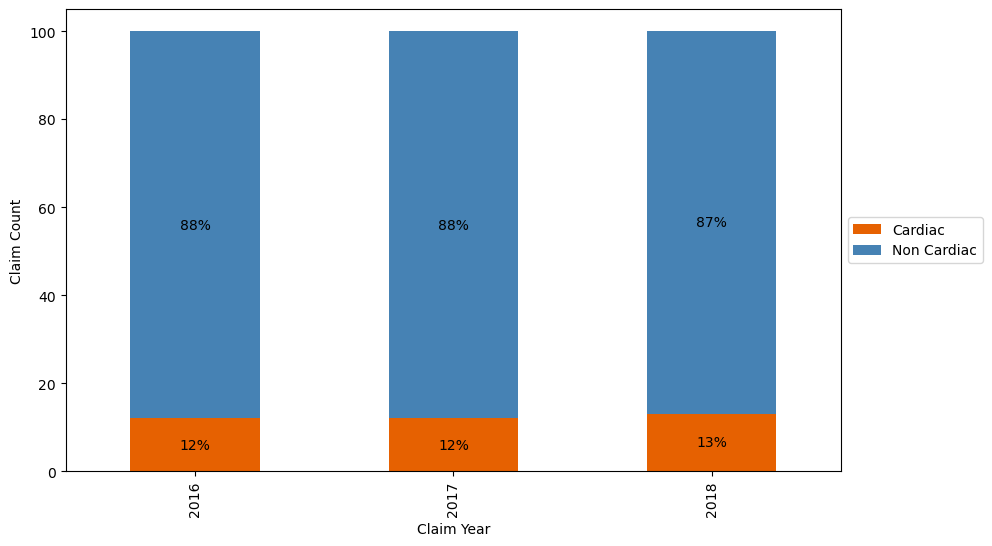

In [348]:
clm_count_by_year_cat_perc_100_stacked_bar_graph = clm_count_by_year_cat_perc_df.plot(kind='bar',
                    stacked=True,
                    color=['#E66101', '#4682B4'],
                    figsize=(10, 6))
for container in clm_count_by_year_cat_perc_100_stacked_bar_graph.containers:
    clm_count_by_year_cat_perc_100_stacked_bar_graph.bar_label(container, labels=[f'{v:.0f}%' for v in container.datavalues], label_type='center')
plt.ylabel("Claim Count")
plt.xlabel("Claim Year")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Business Analysis:**


*   CVM claims have remained consistently low at 12% from 2016 to 2018, while Non-Cardiac procedures dominate at nearly 80%. This stability suggests that while cardiovascular interventions remain essential, their growth is stagnant. To expand market share, we need to explore factors limiting CVM adoption whether it's reimbursement challenges, shifts in treatment protocols, or evolving provider preferences.
*   The broader claims landscape shows steady demand across diagnostic categories like blood tests, panels, and chemistry, reinforcing a stable procedural mix. To drive growth in CVM, we should focus on physician engagement, payer advocacy, and deeper analysis of procedure level trends to identify high-impact opportunities for intervention and expansion.
*   Sales Force Tactics: Identify and engage hospitals and providers with declining CVM utilization to understand barriers and drive adoption. Reallocate sales efforts to high-potential providers who have the infrastructure for cardiac procedures but are underutilizing them. Equip the sales team with data-driven arguments showing how early intervention improves long-term patient outcomes and reduces overall healthcare costs.
* Assumption: This signals a lack of growth in cardiovascular interventions, potentially due to shifts in provider preferences, reimbursement policies, or alternative treatments.

*   Patient Experience: To drive CVM adoption, we must align providers, payers, and patients by reinforcing the value of early intervention. Providers need data-driven insights on how CVM reduces readmissions, payers should optimize reimbursement models to incentivize proactive care, and patients require education to overcome fears and financial concerns. By addressing these gaps, we can enhance patient outcomes and drive sustainable growth in cardiovascular care.
*  Message sent to HCP: If 87% of claims are non-cardiac, what's keeping your cardiology program from leading? Now is the time to reclaim impact—by closing the intervention gap, you improve outcomes, reduce long-term costs, and put your patients back on a healthier path, faster.

















## **Problem 2. HCP Behaviour claim volumne Trend over the years 2016 through 2018**

2.1 Genrating claims volumne dataframe by NPI_ID & Claim year

In [353]:
num_cardiac_clm_by_yr_npi_df = cardiac_uniq_df.groupby(['claim_year', 'npi_id']).agg({'claim_id': 'count'}).reset_index()
num_cardiac_clm_by_yr_npi_df.sort_values('claim_id', ascending=False)

,claim_year,npi_id,claim_id
6631,2018,1.538145e+09,138
6886,2018,1.619913e+09,97
3756,2017,1.538145e+09,84
5180,2018,1.063497e+09,73
3983,2017,1.619913e+09,68
...,...,...,...
2786,2017,1.184621e+09,1
2785,2017,1.184621e+09,1
2783,2017,1.184612e+09,1
2781,2017,1.184611e+09,1


2.2 Segmenting the cardiac HCP on the basis of there claims volumne

In [356]:
cardiac_segmentation = [
    (num_cardiac_clm_by_yr_npi_df['claim_id'] == 1),
    (num_cardiac_clm_by_yr_npi_df['claim_id'] >= 2) & (num_cardiac_clm_by_yr_npi_df['claim_id'] < 4),
    (num_cardiac_clm_by_yr_npi_df['claim_id'] >= 5) & (num_cardiac_clm_by_yr_npi_df['claim_id'] < 9),
    (num_cardiac_clm_by_yr_npi_df['claim_id'] >= 10)
]

letters = ['Disease Aware', 'Trialists', 'Rising Stars', 'High-Volumne Prescribers']

num_cardiac_clm_by_yr_npi_df['claim_id'] = num_cardiac_clm_by_yr_npi_df['claim_id'].astype(str)

num_cardiac_clm_by_yr_npi_df['bucket'] = np.select(cardiac_segmentation, letters)
num_cardiac_clm_by_yr_npi_df

,claim_year,npi_id,claim_id,bucket
0,2016,1.003285e+09,1,Disease Aware
1,2016,1.003802e+09,1,Disease Aware
2,2016,1.003803e+09,1,Disease Aware
3,2016,1.003803e+09,1,Disease Aware
4,2016,1.003808e+09,1,Disease Aware
...,...,...,...,...
7990,2018,1.992920e+09,1,Disease Aware
7991,2018,1.992942e+09,1,Disease Aware
7992,2018,1.992952e+09,1,Disease Aware
7993,2018,1.992978e+09,1,Disease Aware


2.2.1 Aggregating the claim volumne by segmentation & claim year

In [359]:
cardiac_clm_group_by_yr_npi_df = num_cardiac_clm_by_yr_npi_df.groupby(
    ['bucket', 'claim_year']
).agg({'npi_id': 'count'}).reset_index().sort_values(['bucket','claim_year'])
cardiac_clm_group_by_yr_npi_df

,bucket,claim_year,npi_id
0,0,2016,11
1,0,2017,20
2,0,2018,19
3,Disease Aware,2016,2122
4,Disease Aware,2017,2390
5,Disease Aware,2018,2725
6,High-Volumne Prescribers,2016,37
7,High-Volumne Prescribers,2017,33
8,High-Volumne Prescribers,2018,45
9,Rising Stars,2016,22


2.2.2 Pivoting the claim volumne

In [362]:
cardiac_clm_group_by_yr_npi_df = cardiac_clm_group_by_yr_npi_df.pivot(
    index='claim_year', columns='bucket', values='npi_id'
).reset_index().rename_axis(None, axis=1).set_index('claim_year')[['Disease Aware', 'Trialists', 'Rising Stars', 'High-Volumne Prescribers']]
cardiac_clm_group_by_yr_npi_df

,Disease Aware,Trialists,Rising Stars,High-Volumne Prescribers
claim_year,,,,
2016,2122,139,22,37
2017,2390,185,23,33
2018,2725,209,15,45


2.3 Visualising stacked bar for representing the HCP segmentation and there claim volumne by claim year

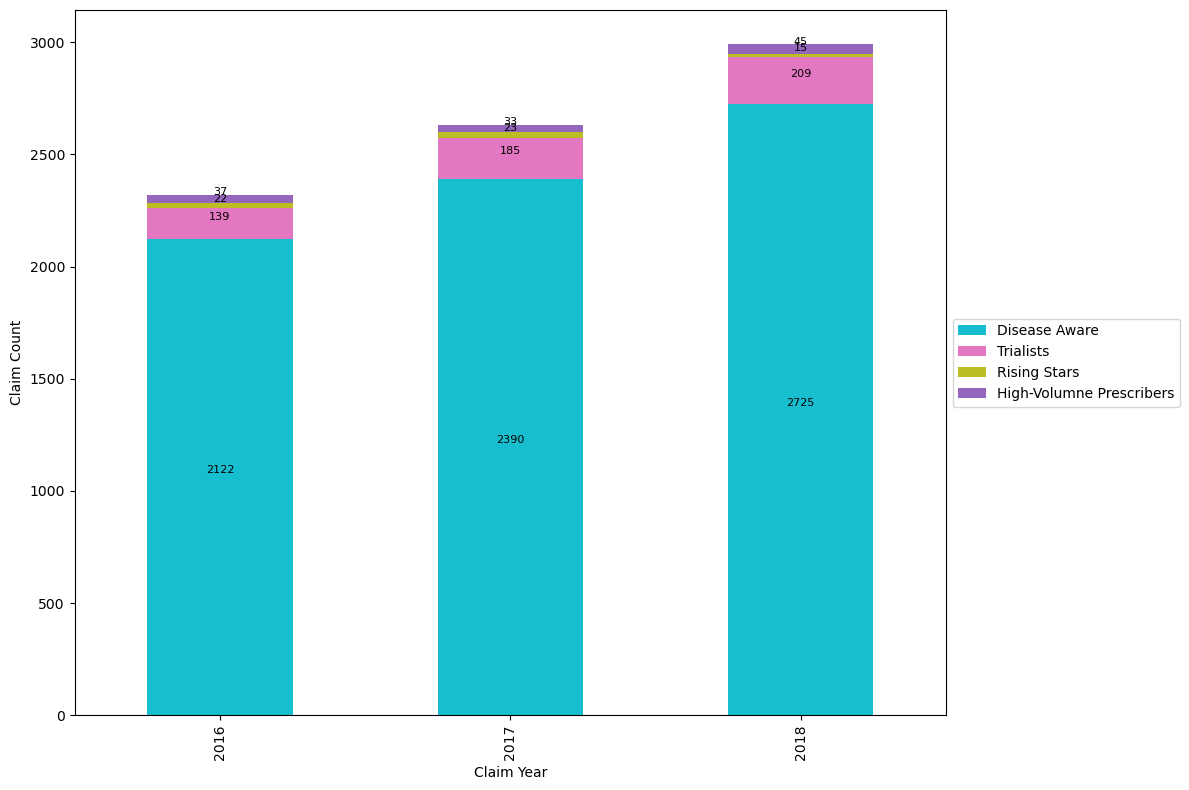

In [365]:

cardiac_clm_group_by_yr_npi_stacked_bar_graph = cardiac_clm_group_by_yr_npi_df.plot(kind='bar',
                    stacked=True,
                    color=['#17BECF', '#E377C2', '#BCBD22', '#9467BD'],
                    figsize=(12, 8))
for container in cardiac_clm_group_by_yr_npi_stacked_bar_graph.containers:
    cardiac_clm_group_by_yr_npi_stacked_bar_graph.bar_label(container, label_type='center', fontsize=8, padding=5)
plt.ylabel("Claim Count")
plt.xlabel("Claim Year")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

**Business Analysis:**

Segmented Sales Deployment Strategy:

Segment 1: Disease Aware (1 CVM claim):
These HCPs have initiated a single CVM claim — a signal of early awareness or one-off patient need. Engagement is minimal and exploratory.

Primary: Non-Personal Promotions (NPP), Educational email series, Awareness-driven webinars, Disease state content (infographics, treatment pathways).

Segment 2: Trialists (2–4 CVM claims): These providers are showing emerging interest — they’ve engaged with CVM procedures more than once, but are still early in their journey.

Blended Engagement Strategy: Digital nurturing through NPP (e.g., clinical case studies, bite-sized videos), Light-touch rep engagement (virtual detailing, rep-triggered emails).

Segment 3: Rising Stars (5–9 CVM claims): HCPs in this group are increasing CVM engagement and demonstrating potential for long-term adoption. They are primed to become high-value prescribers.

Primary: In-Person Sales Force, supported by NPP, Targeted field rep visits with tailored clinical value discussions, CRM-enabled follow-ups and training support.

Segment 4: High-Volume Prescribers (10+ CVM claims): These are your top-tier, high-performing HCPs — experienced, consistent, and often influential within their networks.

High-Touch Relationship Management: Dedicated sales rep or account manager, Strategic business reviews and co-branded opportunities, Personalized digital assets (e.g., performance dashboards, insights tools).


How would you determine which sales tactic is best for which segment?:

Trialists (2–4 CVM Claims):
I have chosen the Trialists segment because they represent the highest potential for conversion with the right sales engagement.



*   High Conversion Potential – They’ve already engaged multiple times, signaling real interest, but need a push to become regular prescribers.
*   Efficient Resource Allocation – Lower investment than Disease Aware HCPs and easier to convert than Rising Stars, making them the best balance between effort and impact.


*   Right Time for Influence – At a critical decision point where targeted digital + light sales rep engagement can accelerate adoption before habits are fully formed.




## **Problem 3. Patient Age demographics claim volumne Trend over the years 2016 through 2018**

3.1 Genrating beneficiary demographic raw dataframe using beneficiary_demographics.csv

In [370]:
beneficiary_demo_raw_df = pd.read_csv("beneficiary_demographics.csv")
beneficiary_demo_raw_df
beneficiary_demo_raw_df.sort_values(by='bene_mbi_id')

,bene_mbi_id,bene_member_month,bene_hic_num,bene_fips_state_cd,bene_fips_cnty_cd,bene_zip_cd,bene_dob,bene_sex_cd,bene_race_cd,bene_age,bene_mdcr_stus_cd,bene_dual_stus_cd,bene_death_dt,bene_rng_bgn_dt,bene_rng_end_dt,bene_1st_name,bene_midl_name,bene_last_name,bene_orgnl_entlmt_rsn_cd,bene_entlmt_buyin_ind,bene_part_a_enrlmt_bgn_dt,bene_part_b_enrlmt_bgn_dt,bene_line_1_adr,bene_line_2_adr,bene_line_3_adr,bene_line_4_adr,bene_line_5_adr,bene_line_6_adr,geo_zip_plc_name,geo_usps_state_cd,geo_zip5_cd,geo_zip4_cd
0,10,2016-01-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
19,10,2017-08-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,72,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
20,10,2017-09-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,72,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
21,10,2017-10-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,72,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
22,10,2017-11-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,72,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31156,13380,2016-02-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,69,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31155,13380,2016-01-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,69,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31182,13380,2018-05-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31168,13380,2017-03-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,70,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN


3.2 Genrating beneficiary demographic dataframe with beneficiary field

In [373]:
beneficiary_demo_raw_df = beneficiary_demo_raw_df[[
    'bene_mbi_id', 'bene_member_month', 'bene_dob','bene_age']].drop_duplicates().rename(
    columns={'bene_mbi_id': 'patient_id', 'bene_member_month' : 'Patient Member Month', 'bene_dob': 'Patient DOB', 'bene_age' : 'Patient Age' }
)
beneficiary_demo_raw_df

,patient_id,Patient Member Month,Patient DOB,Patient Age
0,10,2016-01-01 00:00:00,1945-05-16 00:00:00,71
1,10,2016-02-01 00:00:00,1945-05-16 00:00:00,71
2,10,2016-03-01 00:00:00,1945-05-16 00:00:00,71
3,10,2016-04-01 00:00:00,1945-05-16 00:00:00,71
4,10,2016-05-01 00:00:00,1945-05-16 00:00:00,71
...,...,...,...,...
31179,13380,2018-02-01 00:00:00,1947-03-31 00:00:00,71
31180,13380,2018-03-01 00:00:00,1947-03-31 00:00:00,71
31181,13380,2018-04-01 00:00:00,1947-03-31 00:00:00,71
31182,13380,2018-05-01 00:00:00,1947-03-31 00:00:00,71


3.2.1 Tranforming the Patient DOB & Patient Member Month in the standard format

In [376]:
beneficiary_demo_raw_df[['Patient DOB', 'Patient Member Month']] = beneficiary_demo_raw_df[['Patient DOB', 'Patient Member Month']].apply(pd.to_datetime)
beneficiary_demo_raw_df['Patient DOB'] = beneficiary_demo_raw_df['Patient DOB'].dt.strftime('%Y-%m-%d')
beneficiary_demo_raw_df['Patient Member Month'] = beneficiary_demo_raw_df['Patient Member Month'].dt.strftime('%Y-%m-%d')
beneficiary_demo_raw_df

,patient_id,Patient Member Month,Patient DOB,Patient Age
0,10,2016-01-01,1945-05-16,71
1,10,2016-02-01,1945-05-16,71
2,10,2016-03-01,1945-05-16,71
3,10,2016-04-01,1945-05-16,71
4,10,2016-05-01,1945-05-16,71
...,...,...,...,...
31179,13380,2018-02-01,1947-03-31,71
31180,13380,2018-03-01,1947-03-31,71
31181,13380,2018-04-01,1947-03-31,71
31182,13380,2018-05-01,1947-03-31,71


3.3 Genrating the patient dataframe joining medicare and beneficiary dataframe

In [379]:
patient_df = pd.merge(
    medicare_df,
    beneficiary_demo_raw_df,
    on=['patient_id'], # Changed 'Patient ID' to 'patient_id' to match column in medicare_df
    how='outer'
)
patient_df['claim_id'] = patient_df['claim_id'].fillna(0).astype(int)
patient_df = patient_df.drop_duplicates(subset=['patient_id'], keep='first')
patient_df.sort_values(by='patient_id')

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,claim_year,Patient Member Month,Patient DOB,Patient Age
0,124390,10,NaN,2018-04-11,NaN,Z98890,NaN,2018,2016-01-01,1945-05-16,71
3978,0,12,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,1952-05-18,65
4002,188881,13,NaN,2017-01-13,G0463,E119,NaN,2017,2016-01-01,1944-01-13,72
8727,505631,102,1.578531e+09,2017-05-31,76856,D259,183.72,2017,2016-01-01,1946-03-24,70
14263,427210,109,1.598744e+09,2018-11-04,76536,E270,305.32,2018,2016-01-01,1944-01-13,72
...,...,...,...,...,...,...,...,...,...,...,...
6099982,109314,13374,NaN,2018-05-16,93975,NaN,NaN,2018,2016-01-01,1948-07-11,68
6102887,256983,13376,NaN,2018-08-17,NaN,R197,NaN,2018,2016-01-01,1952-11-28,64
6103600,126254,13377,NaN,2016-10-24,86850,F1521,NaN,2016,2016-01-01,1956-01-16,60
6107001,1010500,13379,1.679512e+09,2016-10-26,92134,H3531,42.72,2016,2016-01-01,1926-12-10,90


In [380]:
print('# of unique patient id: '
      + str(patient_df.shape[0])
     )

# of unique patient id: 1000


3.4 Finalizing the required field for the case.

In [382]:
patient_claim_df = patient_df[['claim_id', 'patient_id', 'claim_year', 'Patient Age']]
patient_claim_df

,claim_id,patient_id,claim_year,Patient Age
0,124390,10,2018,71
3978,0,12,NaN,65
4002,188881,13,2017,72
8727,505631,102,2017,70
14263,427210,109,2018,72
...,...,...,...,...
6099982,109314,13374,2018,68
6102887,256983,13376,2018,64
6103600,126254,13377,2016,60
6107001,1010500,13379,2016,90


3.5 Aggregating patient claim on the patient age and their claim year

In [384]:
patient_claim_by_year_df = patient_claim_df.groupby(['claim_year','Patient Age']).agg(
    patient_clm_count=('claim_id', 'nunique')
)
patient_claim_by_year_df

patient_clm_count
claim_year Patient Age                   
2016       30                           1
           32                           2
           33                           1
           36                           2
           37                           1
...                                   ...
2018       91                           1
           92                           1
           93                           2
           94                           1
           95                           3

[168 rows x 1 columns]

3.6 Segmenting on the patient age

In [386]:
patient_bucket_claim_by_year_df = [
    (patient_claim_by_year_df.index.get_level_values('Patient Age') >= 18) & (patient_claim_by_year_df.index.get_level_values('Patient Age') < 59),
    (patient_claim_by_year_df.index.get_level_values('Patient Age') >= 60) & (patient_claim_by_year_df.index.get_level_values('Patient Age') < 69),
    (patient_claim_by_year_df.index.get_level_values('Patient Age') >= 70) & (patient_claim_by_year_df.index.get_level_values('Patient Age') < 79),
    (patient_claim_by_year_df.index.get_level_values('Patient Age') >= 80)
]

Age_Bucket = ['18 - 59', '60 - 69', '70 - 79','80+']

patient_claim_by_year_df['bucket'] = np.select(patient_bucket_claim_by_year_df, Age_Bucket)
patient_claim_by_year_df

patient_clm_count   bucket
claim_year Patient Age                            
2016       30                           1  18 - 59
           32                           2  18 - 59
           33                           1  18 - 59
           36                           2  18 - 59
           37                           1  18 - 59
...                                   ...      ...
2018       91                           1      80+
           92                           1      80+
           93                           2      80+
           94                           1      80+
           95                           3      80+

[168 rows x 2 columns]

3.6.1 Pivoting the dataframe

In [394]:
patient_claim_by_year_bucket_df = patient_claim_by_year_df.reset_index().groupby(['claim_year', 'bucket'])['patient_clm_count'].sum().unstack()
# Group by 'claim_year' and 'bucket' and sum 'patient_clm_count' for duplicate entries before unstacking.
patient_claim_by_year_bucket_df = patient_claim_by_year_bucket_df.reset_index().rename_axis(None, axis=1).set_index('claim_year')[['18 - 59', '60 - 69', '70 - 79','80+']]
# Proceed with the remaining steps to format the DataFrame.
patient_claim_by_year_bucket_df

,18 - 59,60 - 69,70 - 79,80+
claim_year,,,,
2016,35,80,85,57
2017,31,94,75,58
2018,45,150,110,66


3.7 Visualising stacked bar for representing Patient Age segmentation and there claim volumne by claim year

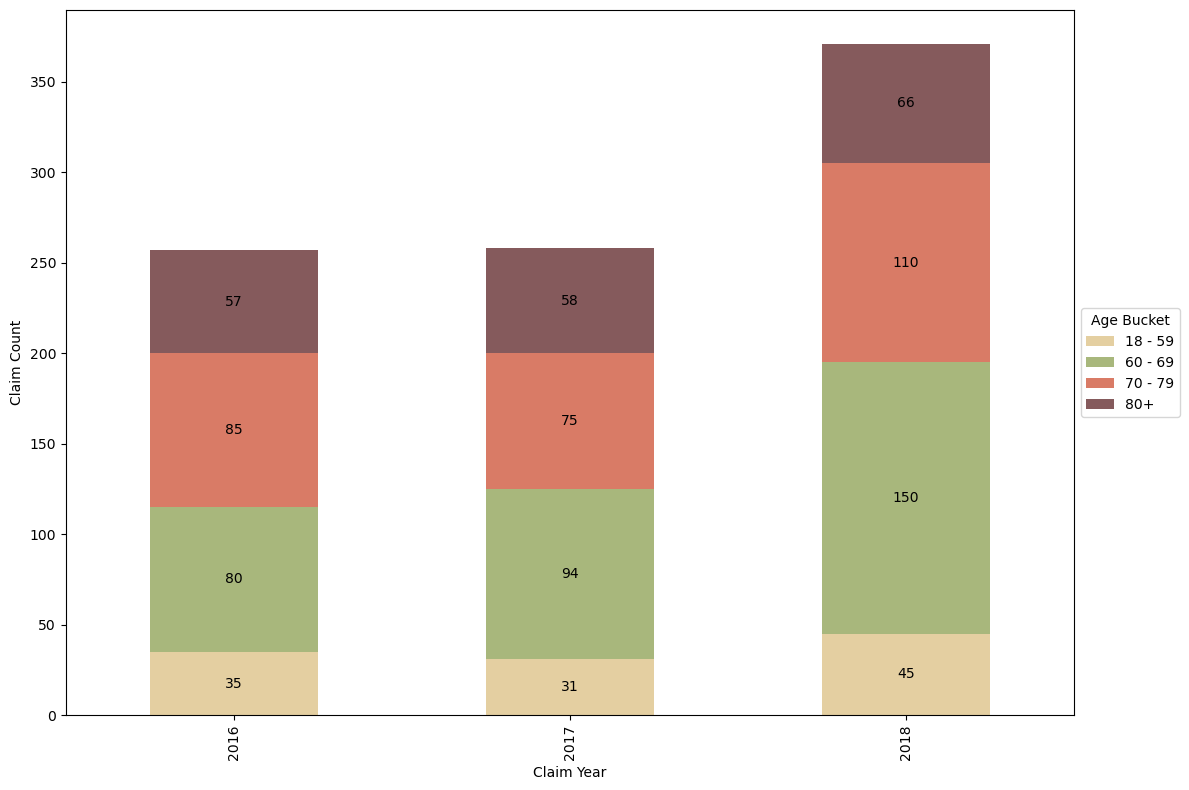

In [397]:
patient_claim_by_year_bucket_df_graph = patient_claim_by_year_bucket_df.plot(kind='bar',
                    stacked=True,
                    color=['#E4CFA1', '#A8B77C', '#D97B66', '#855A5C'],
                    figsize=(12, 8))
for container in patient_claim_by_year_bucket_df_graph.containers:
    patient_claim_by_year_bucket_df_graph.bar_label(container, label_type='center', fontsize=10)
plt.ylabel("Claim Count")
plt.xlabel("Claim Year")
plt.legend(title='Age Bucket',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

3.8 Calculating year-over-year change percentage in the claim volume for each segment

In [400]:
# Calculate the difference between consecutive years for each age group
yoy_diff = patient_claim_by_year_bucket_df.diff()

# Replace NaN values (for the first year) with 0
yoy_diff = yoy_diff.fillna(0)
yoy_diff

# Calculate the percentage change using the formula: (diff / previous_year_value) * 100
yoy_perc_change = (yoy_diff / patient_claim_by_year_bucket_df.shift(1)) * 100
yoy_perc_change = yoy_perc_change.round(1)

# Replace infinite values (if any) and NaN values with 0
yoy_perc_change = yoy_perc_change.replace([np.inf, -np.inf], 0).fillna(0)
yoy_perc_change = yoy_perc_change.astype(str) + '%'

# Display the result
yoy_perc_change

,18 - 59,60 - 69,70 - 79,80+
claim_year,,,,
2016,0.0%,0.0%,0.0%,0.0%
2017,-11.4%,17.5%,-11.8%,1.8%
2018,45.2%,59.6%,46.7%,13.8%


**Business Analysis:**

Optimized Marketing Budget Allocation by Patient Segment:

66+ Age Group (Established CVM Patients – High Claim Volume, Consistent Demand):

Budget Allocation: 50%+

Why allocating the highest ? This segment drives the majority of CVM claims, making them the primary audience for treatment adherence, compliance, and education initiatives.

Marketing Focus:
Provider-Led Education,
Insurance & Reimbursement Awareness,
Community & Senior Health Engagement.

51–65 Age Group (Rising CVM Claims – Preventive & Early Intervention Opportunity):

Budget Allocation: 30-35%

Why allocating ? This segment is growing in CVM claims, presenting a critical window for early diagnosis, lifestyle intervention, and preventive care strategies.

Marketing Focus:
Screening & Early Detection Awareness,
Workplace & Employer Wellness Programs,
Targeted Digital Education

36–50 Age Group (Future CVM Patients – Early Risk Management):

Budget Allocation: 10-15%
Why allocating ? While this group has low current claim volumes, they represent the next wave of CVM patients, making early education essential.

Marketing Focus:
Proactive Risk Awareness, Technology-Driven Engagement, Retail & Pharmacy-Based Initiatives.

0–35 Age Group (Minimal CVM Engagement – Long-Term Preventive Play):

Budget Allocation: <5%
Why allocating ? This segment contributes very little to current CVM claims, but investing in preventive awareness today can create healthier habits for the future.

Marketing Focus: Digital-First Awareness, Gamification & Lifestyle Integration, School & University Health Initiatives.